# 가상화폐로 머신러닝 공부하기


### 사용할 가상화폐 데이터 : BitBay
* Why BitBay? **투자해서**
* coin.csv 실제 1분마다 변동되는 코인 금액 정보 400개를 저장

### 이 학습을 통해 어떠한 결과를 도출하고 싶은가 ? 
* 지도학습을 통한 단타를 치기 좋은 금액을 도출
(사고 빠지기, 사고 빠지기, 사고 빠지기, ...)
* Why 지도학습 ? 하나씩 연습하면서 공부해보기 

### 그에 앞서 머신 러닝의 기본 흐름을 알아보자 
1. 데이터 전처리 (Pre-Processing)
  * 머신이 잘 이해할 수 있도록 데이터를 변경하자
  * 있는 데이터를 나누어 학습 데이터, 예측 데이터로 분류하자
  * 어떤 특징(Feature)를 가지고 예측할지 정한다
  
2. 학습 단계 (Traning)
  * 학습 데이터(Training Set)으로 지도 학습 모델을 적용한다
  
3. 예측 단계 (Prediction)
  * 학습된 모델에 예측 데이터를 넣어주고 결과를 실제 데이터와 비교하여 정확도를 측정한다
  
### Data Fields

 * **code** - 가상화폐 구분 코인. 모두 동일한 값 (BTC-BAY). 비트코인과 비트베이로 구별
 * **candleDateTime** - 현재 시간. 1분주기. 시,분만 유의미하지만 학습을 위해 년,월,일도 모두 분류. 2018-01-03T15:12:00+00:00
 * **candleDateTimeKst** - 위와 동일. 한국표준시. 버릴 것
 * **openingPrice** - Price는 모두 동일. tradePrice와 모두 비례. 나머진 버릴 것 
 * **highPrice** - Price는 모두 동일. tradePrice와 모두 비례. 나머진 버릴 것 
 * **lowPrice** - Price는 모두 동일. tradePrice와 모두 비례. 나머진 버릴 것 
 * **tradePrice** - 거래 가격. 0.00001778. 너무 금액이 작아 스케일링 필요
 * **candleAccTradeVolume** - 거래량. 139062.5591 (BAY). 
 * **candleAccTradePrice** - 거래금액. 2.48809776 (BTC). 너무 금액이 작아 스케일링 필요
 * **timestamp** - 타임스탬프. 중요하지 않은 값. 버릴 것
 * **unit** - 단위 ? 모두 동일한 값. 1
 

In [1]:
# pandas 라이브러리는 데이터를 쉽게 다루기 위한 기능을 제공
# numpy.array의 경우 같은 자료형만 보관 가능, pandas는 다른 자료형 가능
# Excel, CSV 등 다양한 데이터를 쉽게 불러올 수 있음

# import -> Module Import
# as -> Alias 
# pandas 모듈(라이브러리)을 불러와서 pd라는 이름으로 사용한다
import pandas as pd

### Load Dataset

In [2]:
# Exploratory data analysis
# 쥬피터 노트북에서만 사용. (시각화를 하기위한 작업)
%matplotlib inline
import seaborn as sns

# 주로 classification 문제에 사용
#sns.countplot(data=train, x="Sex", hue="Survived")

In [3]:
# index_col를 사용할 경우 특정 header를 index처럼 보이게할 수 있음
# train = pd.read_csv("./coin.csv", index_col=["tradePrice"])
train = pd.read_csv("./coin.csv", usecols=["candleDateTime", "tradePrice", "candleAccTradeVolume", "candleAccTradePrice", "unit"], parse_dates=["candleDateTime"]) 

print(train.shape)
# train data top 5 리스트 확인
train.head()

(400, 5)


,candleDateTime,tradePrice,candleAccTradeVolume,candleAccTradePrice,unit
0,2018-01-03 15:19:00,0.000018,112080.7902,2.004213,1
1,2018-01-03 15:18:00,0.000018,183068.5008,3.274659,1
2,2018-01-03 15:17:00,0.000018,139062.5591,2.488098,1
3,2018-01-03 15:16:00,0.000018,127402.9488,2.253926,1
4,2018-01-03 15:15:00,0.000018,198910.2520,3.578002,1


In [4]:
train["candleDateTime-year"] = train["candleDateTime"].dt.year
train["candleDateTime-month"] = train["candleDateTime"].dt.month
train["candleDateTime-day"] = train["candleDateTime"].dt.day
train["candleDateTime-hour"] = train["candleDateTime"].dt.hour
train["candleDateTime-minute"] = train["candleDateTime"].dt.minute
train["candleDateTime-second"] = train["candleDateTime"].dt.second

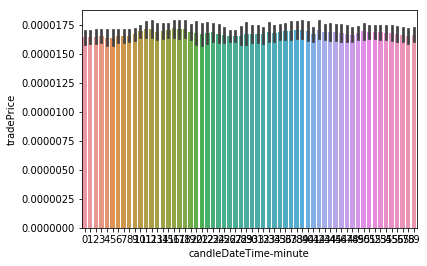

In [5]:
%matplotlib inline
import seaborn as sns

sns.barplot(data=train, x="candleDateTime-minute", y="tradePrice")

In [6]:
# train data structure 확인
# 빈값이 있는지 확인. 빈값을 어떤 값으로 대체할 것인가도 고민 포인트
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
candleDateTime           400 non-null datetime64[ns]
tradePrice               400 non-null float64
candleAccTradeVolume     400 non-null float64
candleAccTradePrice      400 non-null float64
unit                     400 non-null int64
candleDateTime-year      400 non-null int64
candleDateTime-month     400 non-null int64
candleDateTime-day       400 non-null int64
candleDateTime-hour      400 non-null int64
candleDateTime-minute    400 non-null int64
candleDateTime-second    400 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(7)
memory usage: 34.5 KB


In [7]:
# train data 의 수치형 컬럼들에 대한 통계자료 확인
# count 
# mean : 평균값
# std : 
# min : 최소값
# 25% ~ 75% : 
# max : 최대값
train.describe()

,tradePrice,candleAccTradeVolume,candleAccTradePrice,unit,candleDateTime-year,candleDateTime-month,candleDateTime-day,candleDateTime-hour,candleDateTime-minute,candleDateTime-second
count,4.000000e+02,4.000000e+02,400.000000,400.0,400.0,400.0,400.0,400.000000,400.000000,400.0
mean,1.679025e-05,2.035415e+05,3.470659,1.0,2018.0,1.0,3.0,13.200000,27.500000,0.0
std,8.895559e-07,2.005843e+05,3.519431,0.0,0.0,0.0,0.0,0.981023,17.607529,0.0
min,1.502000e-05,2.412948e+04,0.420539,1.0,2018.0,1.0,3.0,12.000000,0.000000,0.0
25%,1.580750e-05,8.489342e+04,1.411445,1.0,2018.0,1.0,3.0,12.000000,12.000000,0.0
50%,1.697000e-05,1.342214e+05,2.346637,1.0,2018.0,1.0,3.0,13.000000,26.000000,0.0
75%,1.755250e-05,2.387430e+05,3.960689,1.0,2018.0,1.0,3.0,14.000000,43.000000,0.0
max,1.830000e-05,1.287868e+06,22.945909,1.0,2018.0,1.0,3.0,15.000000,59.000000,0.0


### Preprocessing

##### Fill in missing Feature Data 
* 현재는 비어있는 값이 없음. Pass

#### Encode candleDateTime
* 연/월/일/시/분/초로 구별하여 데이터를 저장
* 현재 데이터가 분단위로 변경되어 연/월/일은 중요하지 않지만 학습을 위해 분류하겠음

#### Scaleling tradePrice
* 금액이 너무 작은 숫자로 표현되어 있어 데이터를 일정 수준 올려주는 작업

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(train[["tradePrice"]])
train[["tradePrice"]] = scaler.transform(train[["tradePrice"]])

print(train)

         candleDateTime  tradePrice  candleAccTradeVolume  \
0   2018-01-03 15:19:00    1.271606          112080.79020   
1   2018-01-03 15:18:00    1.271606          183068.50080   
2   2018-01-03 15:17:00    1.271606          139062.55910   
3   2018-01-03 15:16:00    1.271606          127402.94880   
4   2018-01-03 15:15:00    1.114027          198910.25200   
5   2018-01-03 15:14:00    1.440441          126258.72950   
6   2018-01-03 15:13:00    1.564253          258162.02780   
7   2018-01-03 15:12:00    1.417930          289492.41970   
8   2018-01-03 15:11:00    1.384163          177099.34910   
9   2018-01-03 15:10:00    1.136539          132756.94760   
10  2018-01-03 15:09:00    0.978960           89688.09645   
11  2018-01-03 15:08:00    0.911426           39283.36690   
12  2018-01-03 15:07:00    0.900170           85796.99930   
13  2018-01-03 15:06:00    0.888914           83660.74069   
14  2018-01-03 15:05:00    0.866403           67161.61680   
15  2018-01-03 15:04:00 

### Train

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train[["candleAccTradeVolume", "candleAccTradePrice", "unit"]], train[["tradePrice"]], test_size=0.33, random_state=0)

In [10]:
print(X_train.head)

<bound method NDFrame.head of      candleAccTradeVolume  candleAccTradePrice  unit
66           1.445859e+05             2.396511     1
240          3.511213e+05             6.328740     1
218          2.412948e+04             0.420539     1
101          1.675691e+05             2.933517     1
311          2.886588e+05             4.944649     1
194          4.751008e+04             0.716243     1
326          1.287868e+06            22.945909     1
17           1.292632e+05             2.252662     1
164          5.065381e+04             0.794262     1
186          8.510661e+04             1.343370     1
30           1.457481e+05             2.513685     1
114          4.310537e+05             7.564473     1
263          1.524689e+05             2.570129     1
103          2.956304e+05             5.201978     1
358          1.297100e+05             2.039949     1
245          1.243196e+05             2.129356     1
235          1.557396e+05             2.745960     1
116          2.2

In [11]:
# sikitlearn 에서 DecisionTreeClassifier import
from sklearn.tree import DecisionTreeRegressor

# random_state 값 : DecisionTreeClassifier 내에서 random 값 사용 시 항상 동일한 결과가 나오도록 하기 위함
# random_state 값을 주지 않으면 매번 예측결과가 random 값의 영향을 받아서 좋아진건지, 모델이 좋아서 그런건지 알 수 없음
seed = 37

# 예측 모델 생성 : decision tree
model = DecisionTreeRegressor(max_depth=5,
                               random_state=seed)

In [12]:
# 예측모델에 train 데이터와 결과 데이터를 주고 학습 수행
print(X_train, y_train)

     candleAccTradeVolume  candleAccTradePrice  unit
66           1.445859e+05             2.396511     1
240          3.511213e+05             6.328740     1
218          2.412948e+04             0.420539     1
101          1.675691e+05             2.933517     1
311          2.886588e+05             4.944649     1
194          4.751008e+04             0.716243     1
326          1.287868e+06            22.945909     1
17           1.292632e+05             2.252662     1
164          5.065381e+04             0.794262     1
186          8.510661e+04             1.343370     1
30           1.457481e+05             2.513685     1
114          4.310537e+05             7.564473     1
263          1.524689e+05             2.570129     1
103          2.956304e+05             5.201978     1
358          1.297100e+05             2.039949     1
245          1.243196e+05             2.129356     1
235          1.557396e+05             2.745960     1
116          2.212882e+05             3.989312

In [13]:
from sklearn import preprocessing

# 예측모델에 train 데이터와 결과 데이터를 주고 학습 수행
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=37, splitter='best')

In [14]:
prediction = model.predict(X_test)
print(prediction.shape)

print(prediction)

(132,)
[-0.24790553  0.65424485 -0.51128757  0.44814342  0.17230513 -0.58118237
 -1.24658801  0.17230513 -0.51128757 -0.58118237  0.44814342  0.65424485
  0.65424485 -1.28717654  0.73283614  0.73283614  0.3180925   0.73283614
  0.65424485  0.44814342 -0.66323875  0.3180925   0.65424485 -0.58118237
 -0.58118237  0.65424485  0.65424485  0.93072106 -0.51128757  0.3180925
 -0.58118237  0.65424485  0.65424485  0.73283614  0.17230513 -0.58118237
  0.44079911 -0.58118237 -0.58118237  0.44814342  0.44814342  0.65424485
  0.65424485  0.44814342  0.44814342 -0.58118237 -1.28717654  0.73283614
 -0.92549522  0.73283614 -0.58118237 -0.58118237  0.93072106 -0.58118237
 -0.66323875  0.65424485 -0.58118237  0.73283614 -0.58118237  0.44079911
  0.93072106 -0.01716486  0.44814342 -0.58118237 -0.58118237 -0.58118237
 -0.58118237  0.93072106 -0.58118237  0.65424485  0.65424485 -0.58118237
  0.3180925   0.73283614  0.44814342 -0.58118237 -1.24658801  0.44814342
 -1.15961259  1.2130769  -0.58118237  0.17230

In [15]:
prediction[:]

array([-0.24790553,  0.65424485, -0.51128757,  0.44814342,  0.17230513,
       -0.58118237, -1.24658801,  0.17230513, -0.51128757, -0.58118237,
        0.44814342,  0.65424485,  0.65424485, -1.28717654,  0.73283614,
        0.73283614,  0.3180925 ,  0.73283614,  0.65424485,  0.44814342,
       -0.66323875,  0.3180925 ,  0.65424485, -0.58118237, -0.58118237,
        0.65424485,  0.65424485,  0.93072106, -0.51128757,  0.3180925 ,
       -0.58118237,  0.65424485,  0.65424485,  0.73283614,  0.17230513,
       -0.58118237,  0.44079911, -0.58118237, -0.58118237,  0.44814342,
        0.44814342,  0.65424485,  0.65424485,  0.44814342,  0.44814342,
       -0.58118237, -1.28717654,  0.73283614, -0.92549522,  0.73283614,
       -0.58118237, -0.58118237,  0.93072106, -0.58118237, -0.66323875,
        0.65424485, -0.58118237,  0.73283614, -0.58118237,  0.44079911,
        0.93072106, -0.01716486,  0.44814342, -0.58118237, -0.58118237,
       -0.58118237, -0.58118237,  0.93072106, -0.58118237,  0.65

In [16]:
from sklearn.cross_validation import cross_val_score
from sklearn import datasets, linear_model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
lasso = linear_model.Lasso()
print(cross_val_score(lasso, prediction, y_test["tradePrice"]))  

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.44814342 -0.58118237 -1.28717654  0.73283614 -0.92549522  0.73283614
 -0.58118237 -0.58118237  0.93072106 -0.58118237 -0.66323875  0.65424485
 -0.58118237  0.73283614 -0.58118237  0.44079911  0.93072106 -0.01716486
  0.44814342 -0.58118237 -0.58118237 -0.58118237 -0.58118237  0.93072106
 -0.58118237  0.65424485  0.65424485 -0.58118237  0.3180925   0.73283614
  0.44814342 -0.58118237 -1.24658801  0.44814342 -1.15961259  1.2130769
 -0.58118237  0.17230513  0.73283614  0.65424485  0.44814342  0.3180925
  0.65424485 -0.58118237 -0.66323875  0.60752332 -1.36221416 -0.58118237
  0.3180925   0.44814342 -0.66323875 -0.58118237  0.44079911 -0.66323875
  0.17230513 -0.58118237 -0.58118237  0.3180925   0.65424485 -0.66323875
  0.44814342  0.73283614  0.65424485 -1.24658801 -1.37346981 -0.51128757
  0.3180925   0.44079911  0.3180925  -0.58118237 -0.51128757  0.44079911
  0.73283614 -0.01716486  0.65424485 -1.17086824  0.73283614 -0.58118237
  0.73283614  0.44079911 -0.58118237 -1.28717654 -0.58118237 -0.58118237
 -1.24658801 -1.17086824 -1.24658801 -0.58118237].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
print(prediction)

In [ ]:
print(y_test["tradePrice"])